In [501]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [502]:
data = pd.read_csv('KaggleV2-May-2016.csv')

In [503]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [504]:
data.info()
#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [505]:
data.describe()
#Age has negative values, need to remove them
#PatiendId and AppointmentID are of no use

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [506]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Some column name are not spelled correctly, fix them

In [507]:
data.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

In [508]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

### Drop the unnecessary column

In [509]:
data = data.drop(['PatientId','AppointmentID'], axis = 1)

In [510]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [512]:
data_temp = data.copy

In [513]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Converting data types of ScheduledDay and Appointment day

In [514]:
data.ScheduledDay = data.ScheduledDay.apply(np.datetime64)

In [515]:
data.AppointmentDay = data.AppointmentDay.apply(np.datetime64)

In [516]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [517]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Unique values for each columns

In [518]:
for col in data:
    print (data[col].unique())

['F' 'M']
['2016-04-29T18:38:08.000000000' '2016-04-29T16:08:27.000000000'
 '2016-04-29T16:19:04.000000000' ..., '2016-04-27T16:03:52.000000000'
 '2016-04-27T15:09:23.000000000' '2016-04-27T13:30:56.000000000']
['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-05-25T00:00:00.000000000'
 '2016-05-11T00:00:00.000000000' '2016-05-18T00:00:00.000000000'
 '2016-05-14T00:00:00.000000000' '2016-06-02T00:00:00.000000000'
 '2016-06-03T00:00:00.000000000' '2016-06-06T00:00:00.000000000'
 '2016-06

In [519]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [520]:
data.Handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [521]:
data.rename(columns={'No-show' : 'No_show'}, inplace = True)

In [522]:
data.No_show.unique()

array(['No', 'Yes'], dtype=object)

In [523]:
data.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [524]:
data = data[(data.Age >=0) & (data.Age <= 90)]

In [525]:
data.Age.value_counts()

0     3539
1     2273
52    1746
49    1652
53    1651
56    1635
38    1629
59    1624
2     1618
50    1613
57    1603
36    1580
51    1567
19    1545
39    1536
37    1533
54    1530
34    1526
33    1524
30    1521
6     1521
3     1513
17    1509
32    1505
5     1489
44    1487
18    1487
58    1469
46    1460
45    1453
      ... 
11    1195
66    1187
14    1118
13    1103
65    1101
12    1092
68    1012
67     973
69     832
73     725
70     724
71     695
72     615
74     602
76     571
75     544
78     541
77     527
80     511
81     434
82     392
79     390
84     311
83     280
85     275
86     260
87     184
89     173
88     126
90     109
Name: Age, Length: 91, dtype: int64

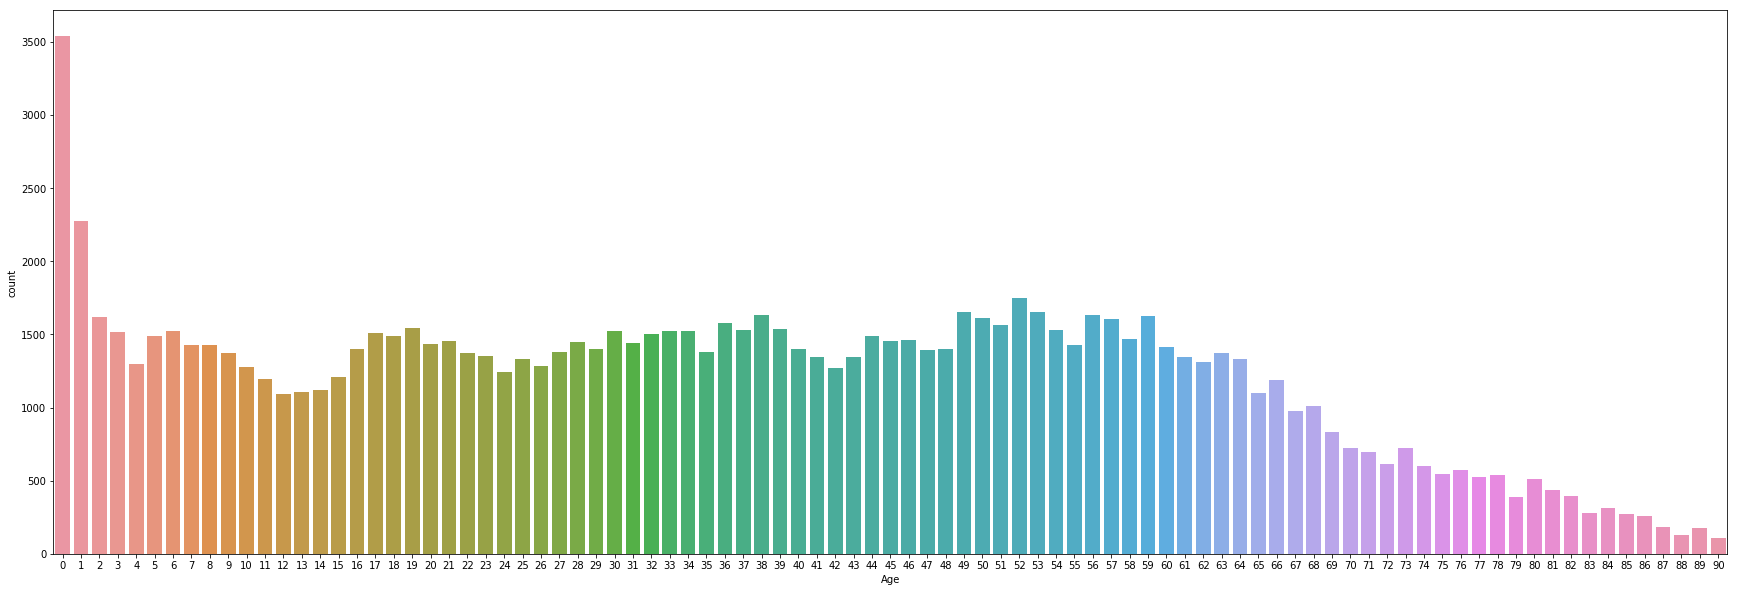

In [526]:
plt.rcParams['figure.figsize']=(30,10)
sns.countplot(x='Age',data = data)

In [527]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [528]:
data.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
110522,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,F,2016-04-27 13:30:56,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Converting Gender, No_show to int values

In [529]:
data.Gender = data.Gender.eq('M').mul(1)

C:\Users\vishal\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [530]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [531]:
data.No_show = data.No_show.eq('No').mul(1)

C:\Users\vishal\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [532]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [533]:
type(data.ScheduledDay)

pandas.core.series.Series

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110218 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110218 non-null int32
ScheduledDay      110218 non-null datetime64[ns]
AppointmentDay    110218 non-null datetime64[ns]
Age               110218 non-null int64
Neighbourhood     110218 non-null object
Scholarship       110218 non-null int64
Hypertension      110218 non-null int64
Diabetes          110218 non-null int64
Alcoholism        110218 non-null int64
Handicap          110218 non-null int64
SMS_received      110218 non-null int64
No_show           110218 non-null int32
dtypes: datetime64[ns](2), int32(2), int64(7), object(1)
memory usage: 15.1+ MB


In [535]:
data['before_days'] = (data.AppointmentDay - np.asarray(data.ScheduledDay.dt.date))

C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [536]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,before_days
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0 days
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0 days
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0 days
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0 days
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0 days


In [537]:
data['Sche_day'] = data['ScheduledDay'].dt.date

C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [538]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,before_days,Sche_day
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0 days,2016-04-29
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0 days,2016-04-29
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0 days,2016-04-29
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0 days,2016-04-29
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0 days,2016-04-29


In [539]:
data = data.drop('before_days',axis = 1)

In [540]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Sche_day
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29


In [541]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110218 entries, 0 to 110526
Data columns (total 13 columns):
Gender            110218 non-null int32
ScheduledDay      110218 non-null datetime64[ns]
AppointmentDay    110218 non-null datetime64[ns]
Age               110218 non-null int64
Neighbourhood     110218 non-null object
Scholarship       110218 non-null int64
Hypertension      110218 non-null int64
Diabetes          110218 non-null int64
Alcoholism        110218 non-null int64
Handicap          110218 non-null int64
SMS_received      110218 non-null int64
No_show           110218 non-null int32
Sche_day          110218 non-null object
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 15.9+ MB


In [542]:
data['Sche_day'] = np.asarray(data['Sche_day'])

In [543]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110218 entries, 0 to 110526
Data columns (total 13 columns):
Gender            110218 non-null int32
ScheduledDay      110218 non-null datetime64[ns]
AppointmentDay    110218 non-null datetime64[ns]
Age               110218 non-null int64
Neighbourhood     110218 non-null object
Scholarship       110218 non-null int64
Hypertension      110218 non-null int64
Diabetes          110218 non-null int64
Alcoholism        110218 non-null int64
Handicap          110218 non-null int64
SMS_received      110218 non-null int64
No_show           110218 non-null int32
Sche_day          110218 non-null object
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 15.9+ MB


In [544]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Sche_day
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29


In [545]:
data['before_days'] = data.AppointmentDay  - np.asarray(data.Sche_day)

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110218 entries, 0 to 110526
Data columns (total 14 columns):
Gender            110218 non-null int32
ScheduledDay      110218 non-null datetime64[ns]
AppointmentDay    110218 non-null datetime64[ns]
Age               110218 non-null int64
Neighbourhood     110218 non-null object
Scholarship       110218 non-null int64
Hypertension      110218 non-null int64
Diabetes          110218 non-null int64
Alcoholism        110218 non-null int64
Handicap          110218 non-null int64
SMS_received      110218 non-null int64
No_show           110218 non-null int32
Sche_day          110218 non-null object
before_days       110218 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int32(2), int64(7), object(2), timedelta64[ns](1)
memory usage: 16.8+ MB


In [547]:
import datetime


In [548]:
type(data)

pandas.core.frame.DataFrame

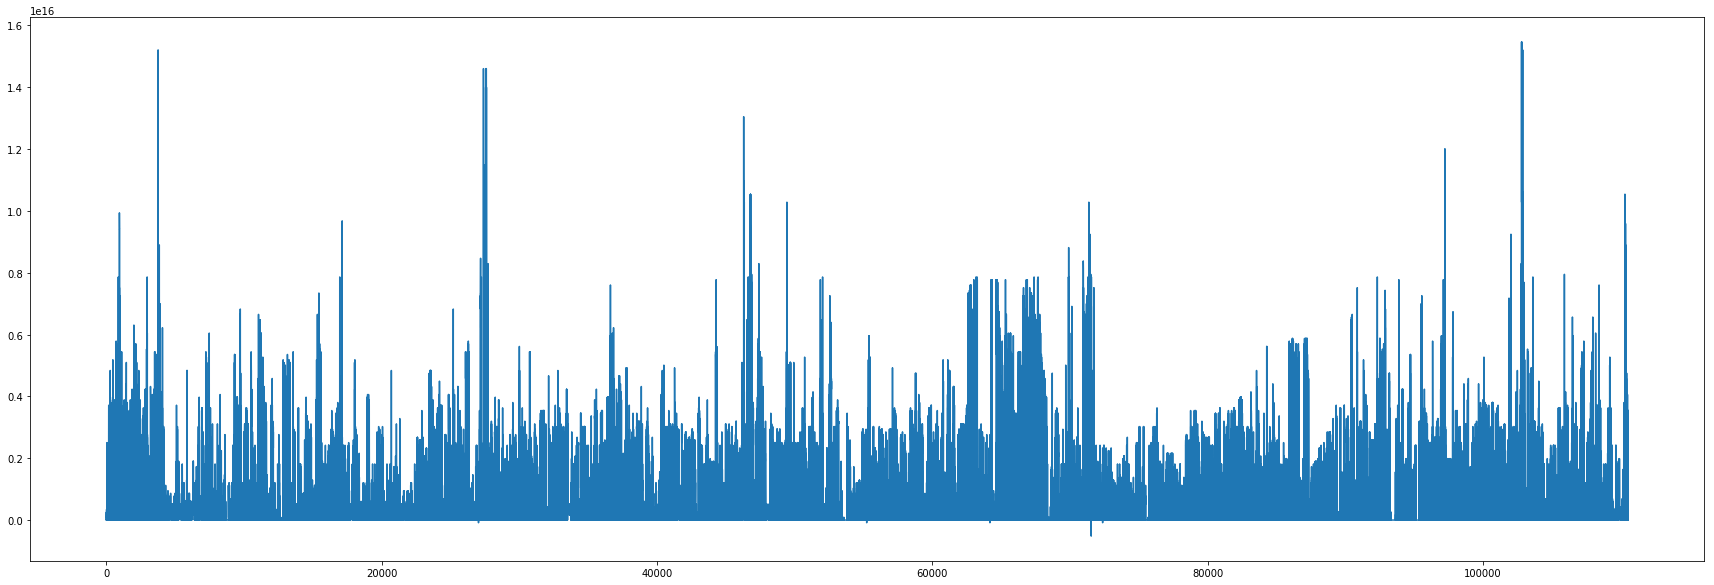

In [549]:
plt.plot(data['before_days'])

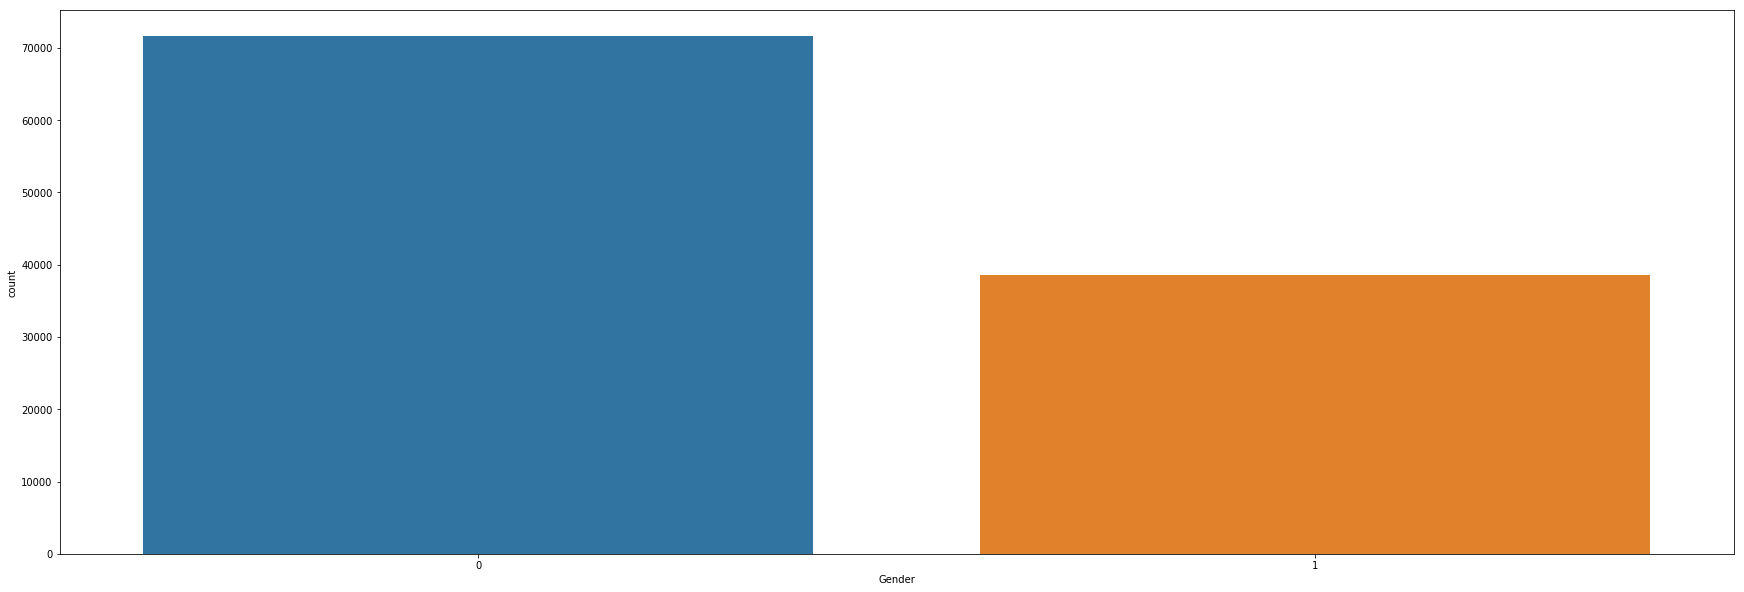

In [550]:
sns.countplot(data['Gender'])

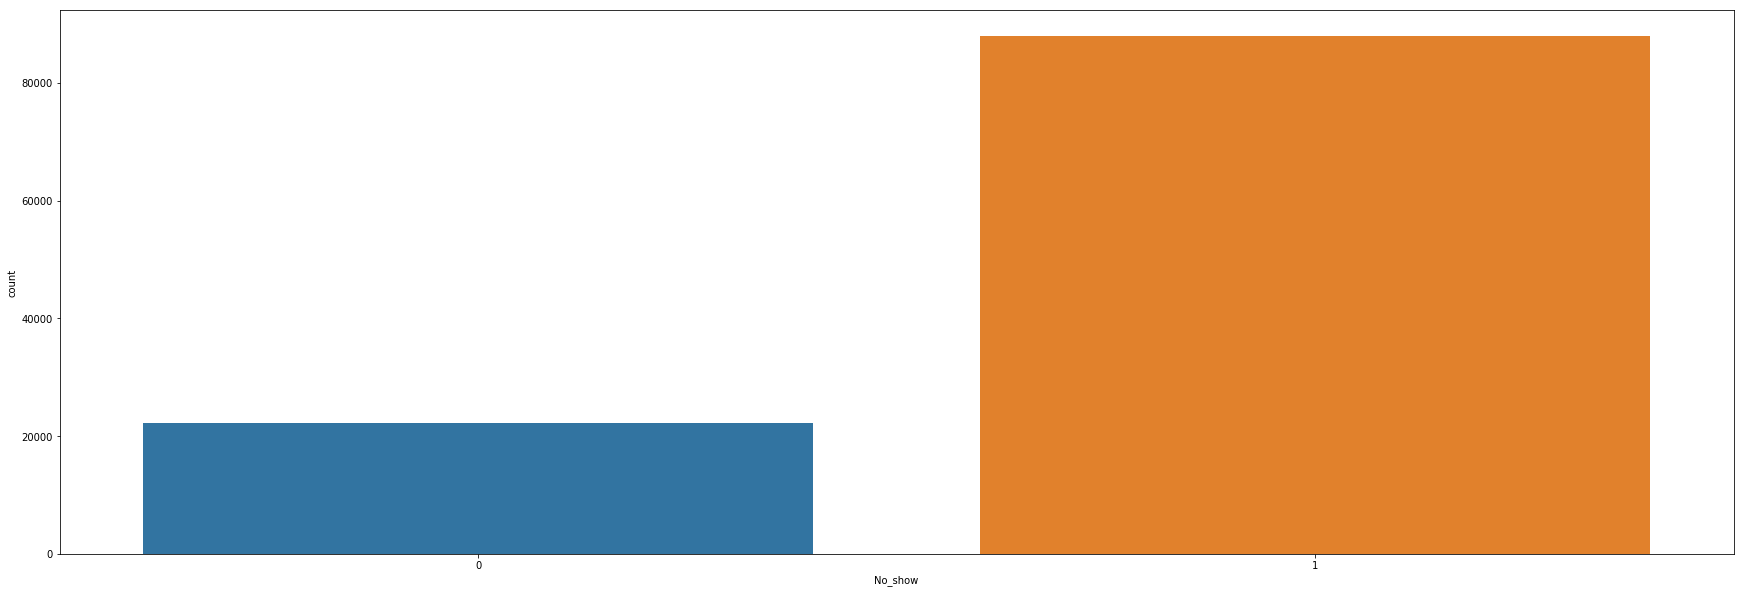

In [551]:
sns.countplot(data['No_show'])

In [552]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110218 entries, 0 to 110526
Data columns (total 14 columns):
Gender            110218 non-null int32
ScheduledDay      110218 non-null datetime64[ns]
AppointmentDay    110218 non-null datetime64[ns]
Age               110218 non-null int64
Neighbourhood     110218 non-null object
Scholarship       110218 non-null int64
Hypertension      110218 non-null int64
Diabetes          110218 non-null int64
Alcoholism        110218 non-null int64
Handicap          110218 non-null int64
SMS_received      110218 non-null int64
No_show           110218 non-null int32
Sche_day          110218 non-null object
before_days       110218 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int32(2), int64(7), object(2), timedelta64[ns](1)
memory usage: 16.8+ MB


In [553]:
data_female = data[data['Gender'] == 0]

In [554]:
data_male = data[data['Gender'] ==1]

In [555]:
data_female['No_show'].value_counts()

1    57074
0    14545
Name: No_show, dtype: int64

In [556]:
data_male['No_show'].value_counts()

1    30887
0     7712
Name: No_show, dtype: int64

In [557]:
data['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7699
MARIA ORTIZ                    5791
RESISTÊNCIA                    4415
JARDIM DA PENHA                3856
ITARARÉ                        3501
CENTRO                         3314
SANTA MARTHA                   3117
TABUAZEIRO                     3112
JESUS DE NAZARETH              2848
BONFIM                         2765
SANTO ANTÔNIO                  2739
SANTO ANDRÉ                    2570
CARATOÍRA                      2553
JABOUR                         2508
SÃO PEDRO                      2447
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2262
ANDORINHAS                     2255
ROMÃO                          2213
DA PENHA                       2211
GURIGICA                       2012
SÃO JOSÉ                       1973
BELA VISTA                     1902
MARUÍPE                        1896
FORTE SÃO JOÃO                 1888
ILHA DE SANTA MARIA            1882
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C462DB5D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C4618EC2E8>]], dtype=object)

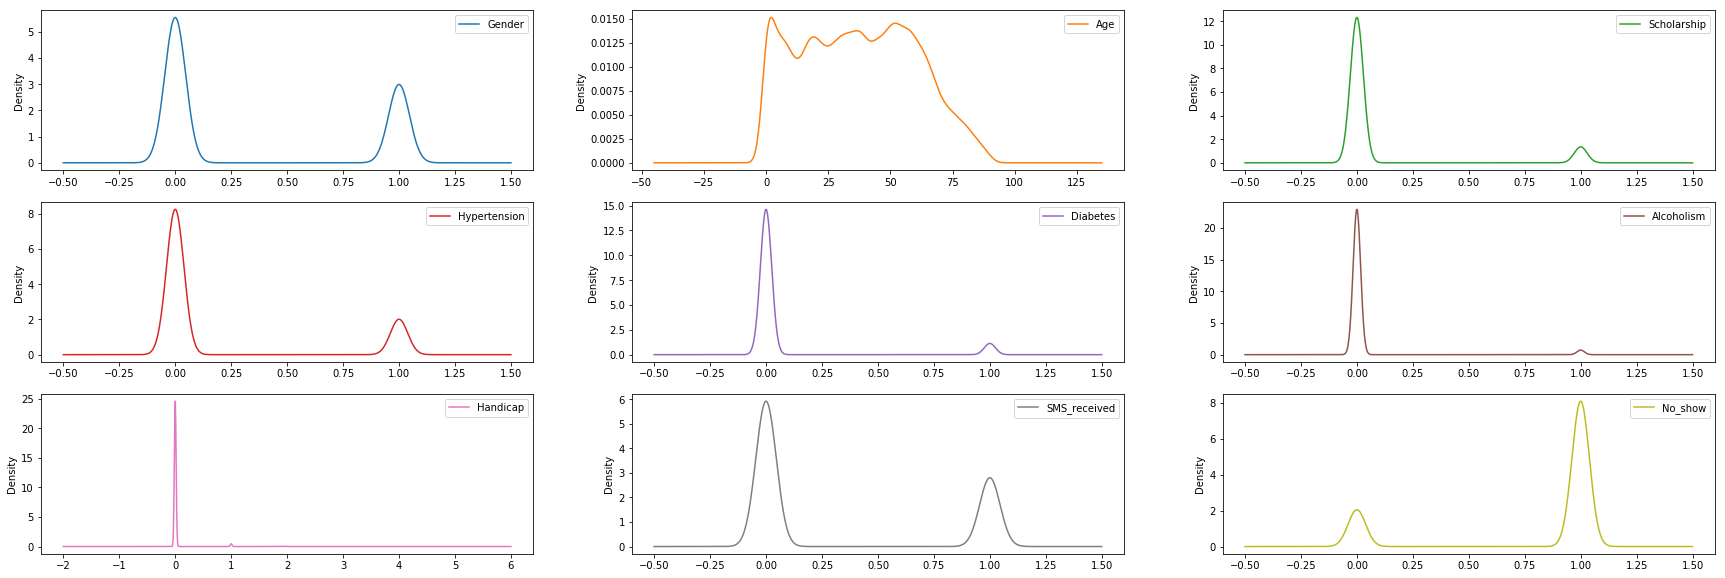

In [558]:
data.plot(kind='density',subplots=True,layout=(3,3), sharex=False)

In [559]:
data.Handicap.value_counts()

0    108007
1      2015
2       180
3        13
4         3
Name: Handicap, dtype: int64

In [560]:
data.Alcoholism.value_counts()

0    106858
1      3360
Name: Alcoholism, dtype: int64

In [561]:
data.Scholarship.value_counts()

0    99357
1    10861
Name: Scholarship, dtype: int64

In [562]:
data_temp = data.copy()

In [563]:
data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show', 'Sche_day', 'before_days'],
      dtype='object')

In [564]:
correlations = data.corr()

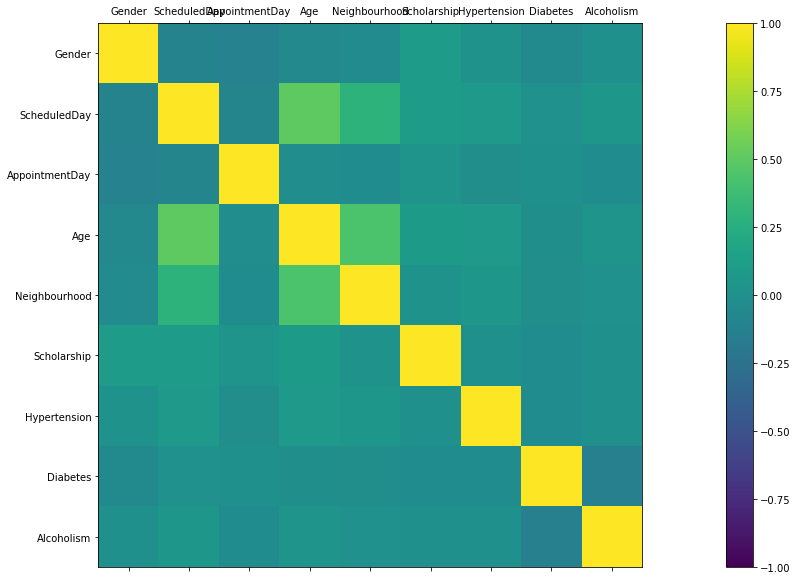

In [565]:
names = ['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show', 'Sche_day', 'before_days']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [566]:
data.columns


Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show', 'Sche_day', 'before_days'],
      dtype='object')

In [567]:
final_data = data[['Gender', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes',
       'SMS_received', 'No_show']]

In [568]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110218 entries, 0 to 110526
Data columns (total 8 columns):
Gender           110218 non-null int32
Age              110218 non-null int64
Neighbourhood    110218 non-null object
Scholarship      110218 non-null int64
Hypertension     110218 non-null int64
Diabetes         110218 non-null int64
SMS_received     110218 non-null int64
No_show          110218 non-null int32
dtypes: int32(2), int64(5), object(1)
memory usage: 11.7+ MB


In [569]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [570]:
final_X = final_data[['Gender', 'Age', 
       'Scholarship', 'Hypertension', 'Diabetes',
       'SMS_received']]

In [571]:
final_Y = final_data[['No_show']]

In [572]:
final_X.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,SMS_received
0,0,62,0,1,0,0
1,1,56,0,0,0,0
2,0,62,0,0,0,0
3,0,8,0,0,0,0
4,0,56,0,1,1,0


In [573]:
final_Y.head()

,No_show
0,1
1,1
2,1
3,1
4,1


In [574]:
X_train, X_test, y_train, y_test = train_test_split(final_X, final_Y, test_size=0.2)

In [575]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [576]:
rfe = LogisticRegression()

In [577]:
rfe.fit(X_train,y_train)

C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [578]:
y_pred = rfe.predict(X_test)

In [579]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      4389
          1       0.80      1.00      0.89     17655

avg / total       0.64      0.80      0.71     22044

0.800898203593


C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [580]:
from sklearn import tree

In [581]:
model = tree.DecisionTreeClassifier()

In [582]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [583]:
model.score(X_train,y_train)

0.79881824574137505

In [584]:
predicted = model.predict(X_test)

In [585]:
print(accuracy_score(y_test,predicted))

0.79763200871


In [586]:
from sklearn.naive_bayes import GaussianNB

In [587]:
model = GaussianNB()
model.fit(X_train, y_train)

C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [588]:
predicted= model.predict(X_test)

In [589]:
print(accuracy_score(y_test,predicted))

0.792959535475


In [590]:
from sklearn.ensemble import RandomForestClassifier

In [591]:
model= RandomForestClassifier()

In [592]:
model.fit(X_train, y_train)
#Predict Output
predicted= model.predict(X_test)

C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [593]:
print(accuracy_score(y_test,predicted))

0.798811467973


In [594]:
from sklearn.ensemble import GradientBoostingClassifier

In [595]:
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [596]:
model.fit(X_train, y_train)
#Predict Output
predicted= model.predict(X_test)

C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [597]:
print(accuracy_score(y_test,predicted))

0.800898203593


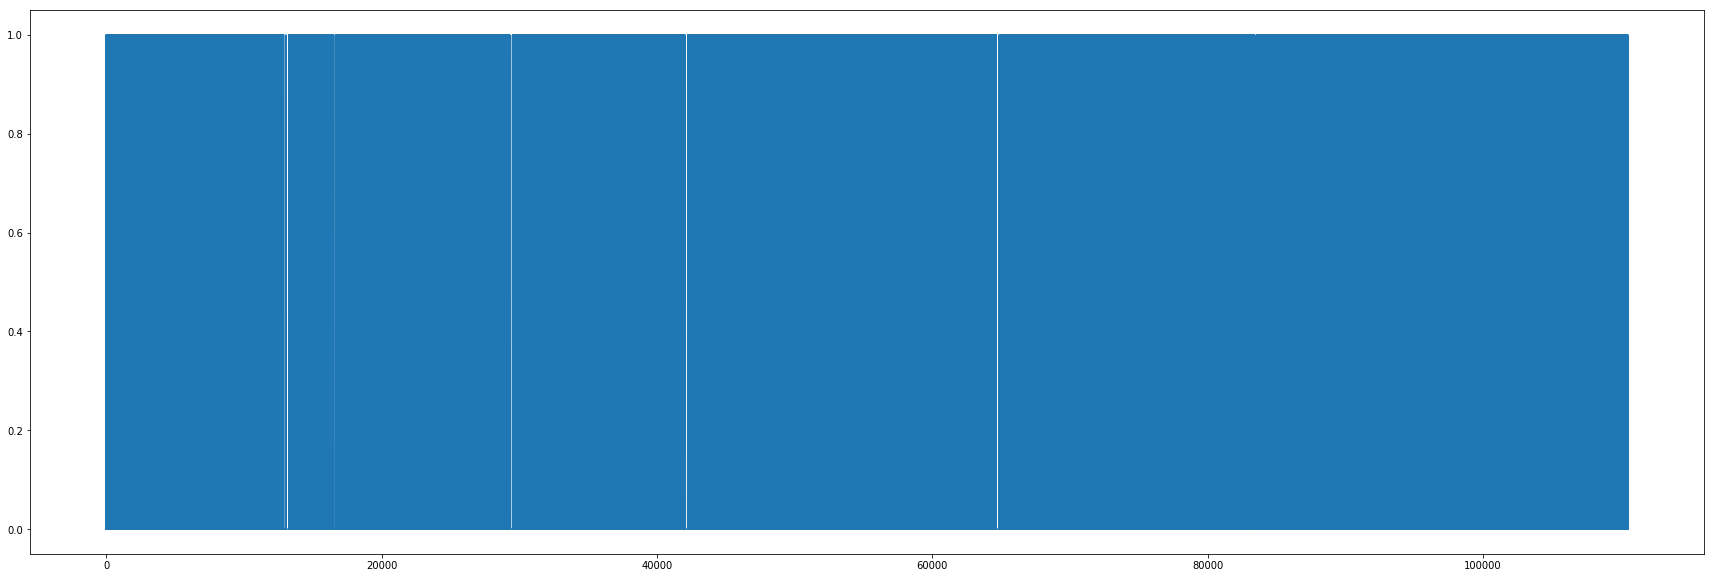

In [598]:
plt.plot(data['Gender'])

In [599]:
data.columns


Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show', 'Sche_day', 'before_days'],
      dtype='object')

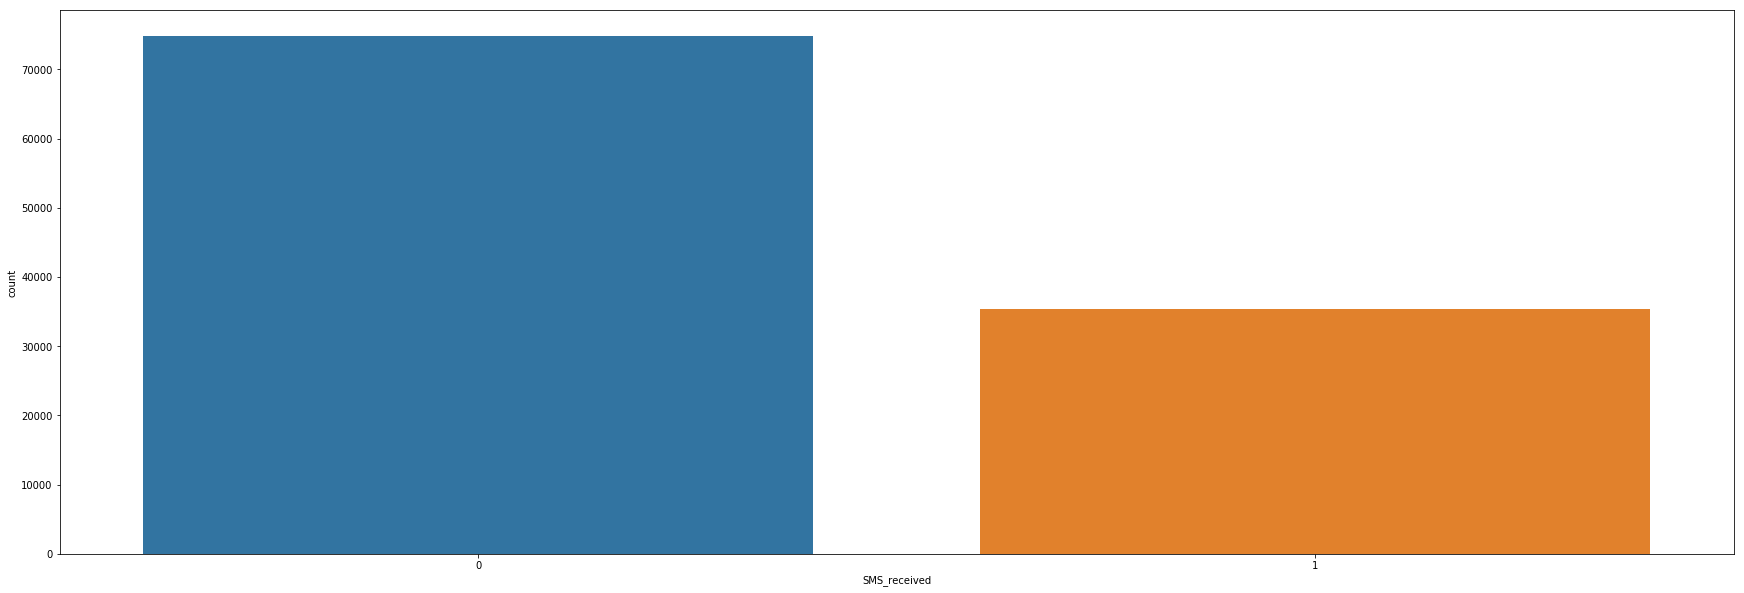

In [600]:
sns.countplot(data.SMS_received)

In [601]:
len(data[(data['SMS_received'] == 0) & (data['No_show'] == 0)])

12488